<a href="https://colab.research.google.com/github/IndioP/Projeto-AM/blob/main/Avila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 de Aprendizado de Máquina
## Grupo
- João Victor de Lima Peixoto
- José Douglas Pontes Silva
- Marcos Heitor Carvalho de Oliveira
- Mikael Vidal da Silva

# Introdução
O projeto da cadeira de aprendizado de máquina visa aplicar as diferentes técnicas aprendidas na disciplina para fazer uma análise exploratoria sobre a `precisão`, `cobertura` e `f1-score` presentes no uso de cada algoritmo estudado em um `dataset` do mundo real.

Os algoritmos aprendidos na cadeira e testados no projeto foram:
- Árvores de Decisões
- Bayesiano Ingenuo
- Regressão Logistica
- K Vizinhos

, onde cada algoritmo apresenta parâmetros e logicas próprias que serão discutidas na fundamentação teórica deste relatório.

O conjunto de dados testado no projeto foi o `Avila Data Set`. Em resumo, esse conjunto de dados foi extraido através de 800 imagens da Biblia de Avila, uma cópia em latim da Biblia produzida no século XII em um local entre a Itália e a Espanha. No capítulo do conjunto de dados, faremos uma descrição mais ampla de como esse dataset é dividido e também 


# Fundamentação Teórica
## Decision Tree Classifier

## Naive Bayes

## Logistic Regression

## K-Neighbors

# Conjunto de Dados

A analisa paleografica do manuscrito indicou a presença de 12 escrivãos responsáveis pela copia. A quantidade de páginas escritas por cada escrivão não é igual.

Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.


# Metodologia

# Resultados


In [1]:
!git clone https://github.com/IndioP/Projeto-AM

Cloning into 'Projeto-AM'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 11), reused 5 (delta 2), pack-reused 0
Unpacking objects: 100% (26/26), 585.33 KiB | 1.69 MiB/s, done.


In [2]:
import pandas as pd

In [3]:
names = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']
df = pd.read_csv("Projeto-AM/avila-tr.txt",names = names)

In [4]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_valid,y_train,y_valid = train_test_split(df.drop("Class",axis=1), df["Class"],test_size=0.2)

In [7]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((8344, 10), (8344,), (2086, 10), (2086,))

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [10]:
df = pd.read_csv("Projeto-AM/avila-ts.txt",names=names)

In [11]:
X_test = df.drop("Class",axis=1)
y_test = df["Class"]

In [30]:
models = [DecisionTreeClassifier(), GaussianNB(), Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=10000))]), KNeighborsClassifier()]
models_names = ["DecisionTreeClassifier", "GaussianNB", "LogisticRegression", "KNeighborsClassifier"]
for model,name in zip(models,models_names):
  print(f'model ',name)
  clf = model
  clf.fit(X_train,y_train)
  
  print("acuracia =",clf.score(X_valid,y_valid))
  
  pred = clf.predict(X_valid)
  print("f1",f1_score(pred,y_valid,average="weighted"))
  print("recall",recall_score(pred,y_valid,average="weighted"))
  print("precision",precision_score(pred,y_valid,average="weighted"))
  print("-"*100)

model  DecisionTreeClassifier
acuracia = 0.9688398849472675
f1 0.9690226000324956
recall 0.9688398849472675
precision 0.9695489907053665
----------------------------------------------------------------------------------------------------
model  GaussianNB
acuracia = 0.30393096836049854
f1 0.33956565735919547
recall 0.30393096836049854
precision 0.5273888630048709
----------------------------------------------------------------------------------------------------
model  LogisticRegression
acuracia = 0.5671140939597316
f1 0.6465871880678999
recall 0.5671140939597316
precision 0.810989949281844
----------------------------------------------------------------------------------------------------
model  KNeighborsClassifier


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


acuracia = 0.7377756471716204
f1 0.7475585477998099
recall 0.7377756471716204
precision 0.7713030109666033
----------------------------------------------------------------------------------------------------


In [13]:
pred = clf.predict(X_test)
print("f1",f1_score(pred,y_test,average="weighted"))
print("recall",recall_score(pred,y_test,average="weighted"))
print("precision",precision_score(pred,y_test,average="weighted"))

f1 0.7372855832894668
recall 0.7314362364664175
precision 0.7551783228877619


In [14]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 3.9 MB/s eta 0:00:00


# DecisionTreeClassifier parameters

In [ ]:
criterion = "gini" #What is the criterion used for the split
#There is an scientific paper comparing gini and entropy and they diverge in only 2% of the cases, but entropy is a little slower because of logarithm

splitter = "best" #The strategy used to choose the split at each node
#If the model is suffering from overfitting we can change it to random, to avoid this fate

max_depth = None #can be None to go forever till purity beeing achieved

min_samples_split = 2 #if int, it is the minimal number to make a split
                      #if float, it is the min_samples_split * n_samples

min_samples_leaf = 1 #int, float

#min_weight_fraction_leaf = 

max_features = None #there are few features, so I think

In [ ]:
from sklearn.utils.extmath import weighted_mode
import optuna



def objective(trial):
    min_samples_split = trial.suggest_int("min_samples_split",2,50)
    min_samples_leaf = trial.suggest_int("min_samples_leaf",1,30)
    
    clf = DecisionTreeClassifier(
                                #criterion=criterion,
                                #splitter=splitter,
                                min_samples_split=min_samples_split,
                                #max_depth=max_depth, 
                                #min_samples_leaf=min_samples_leaf, 
                                max_features=max_features
                                )
    clf.fit(X_train,y_train)
    pred = clf.predict(X_valid)
    return f1_score(pred,y_valid,average="weighted")

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)

[I 2023-02-15 04:07:26,558] A new study created in memory with name: no-name-3563c78c-f2aa-4ab2-a811-0b76dbfe3271
[I 2023-02-15 04:07:26,653] Trial 0 finished with value: 0.7843459221056069 and parameters: {'min_samples_split': 29, 'min_samples_leaf': 30}. Best is trial 0 with value: 0.7843459221056069.
[I 2023-02-15 04:07:26,734] Trial 1 finished with value: 0.8168443551952949 and parameters: {'min_samples_split': 19, 'min_samples_leaf': 27}. Best is trial 1 with value: 0.8168443551952949.
[I 2023-02-15 04:07:26,838] Trial 2 finished with value: 0.7726110571160898 and parameters: {'min_samples_split': 30, 'min_samples_leaf': 21}. Best is trial 1 with value: 0.8168443551952949.
[I 2023-02-15 04:07:26,940] Trial 3 finished with value: 0.819542710821096 and parameters: {'min_samples_split': 47, 'min_samples_leaf': 11}. Best is trial 3 with value: 0.819542710821096.
[I 2023-02-15 04:07:27,022] Trial 4 finished with value: 0.8378032043142403 and parameters: {'min_samples_split': 16, 'min_s

KeyboardInterrupt: ignored

# Naive Bayes

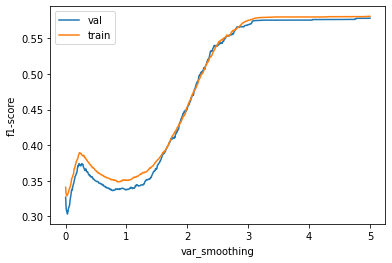

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

results_val = []
results_train = []
x = np.linspace(1e-3,5,1000) #unico parametro que parece ser relevante????
for i in x:
  clf = GaussianNB(var_smoothing = i)
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

plt.plot(x,results_val,label='val')
plt.plot(x,results_train,label='train')
plt.ylabel("f1-score")
plt.xlabel("var_smoothing")
plt.legend()

In [ ]:
clf = GaussianNB(var_smoothing = 3)
clf.fit(X_train,y_train)
print("acuracia =",clf.score(X_valid,y_valid))

pred = clf.predict(X_valid)
print("f1",f1_score(pred,y_valid,average="weighted"))
print("recall",recall_score(pred,y_valid,average="weighted"))
print("precision",precision_score(pred,y_valid,average="weighted"))
print("-"*100)

acuracia = 0.41083413231064236
f1 0.5688927350446688
recall 0.41083413231064236
precision 0.9596600957668628
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusão:
**Com essa modificação no var_smoothing de 1e-9 para 3 o modelo teve ganhos significativos em todas as metricas**

# LogisticRegression
penalty = {l1, l2, elasticnet, None}

dual= {True or False} Prefer dual=False when n_samples > n_features.

tol = 1e-4

C = 1.0

fit_intercept = True

intercept_scaling = 1

class_weight = **dict** or ‘balanced’, default=None

solver = {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; 

random_state = None **Used when solver == ‘sag’, ‘saga’**



[0.6435808736869868, 0.6441712608851968, 0.6437895945520383, 0.6440263088303434, 0.6436150014877835, 0.6434910467865874, 0.6436144094616797, 0.643622933489017, 0.6436291898351842, 0.6437982590853117, 0.6437899249326269, 0.6435012957603373, 0.6435230907748427]
[0.6460836265664601, 0.6459128944942084, 0.6464697294386604, 0.6458448956376442, 0.6458448956376442, 0.6457897554536343, 0.6457897554536343, 0.6459400809073845, 0.6457992899451068, 0.645995120258948, 0.6460836265664601, 0.6460836265664601, 0.6460836265664601]
['l1', 'l2', None, 'elasticnet_0.1', 'elasticnet_0.2', 'elasticnet_0.30000000000000004', 'elasticnet_0.4', 'elasticnet_0.5', 'elasticnet_0.6', 'elasticnet_0.7000000000000001', 'elasticnet_0.8', 'elasticnet_0.9', 'elasticnet_1.0']


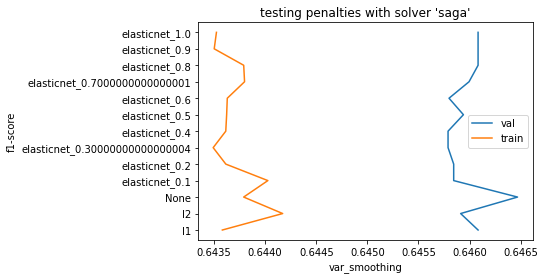

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

results_val = []
results_train = []
penalties = ['l1','l2',None]
for penalty in penalties:
  clf = pipe = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(penalty=penalty,solver='saga',max_iter=10000))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))

for l1_ratio in np.linspace(0.1,1.0,10):
  penalties.append(f"elasticnet_{l1_ratio}")
  clf = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=l1_ratio,max_iter=10000))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))
    
print(results_train)
print(results_val)
print(penalties)
penalties = [str(p) for p in penalties]
plt.title("testing penalties with solver 'saga'")
plt.plot(results_val,penalties,label='val')
plt.plot(results_train,penalties,label='train')
plt.ylabel("f1-score")
plt.xlabel("var_smoothing")
plt.legend()

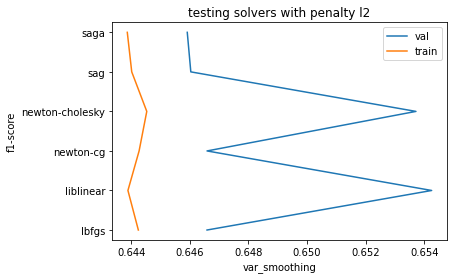

In [33]:
results_val = []
results_train = []
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
for solver in solvers:
  clf = pipe = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(solver = solver,max_iter=10000,random_state=42))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))
    


plt.title("testing solvers with penalty l2")
plt.plot(results_val,solvers,label='val')
plt.plot(results_train,solvers,label='train')
plt.ylabel("f1-score")
plt.xlabel("var_smoothing")
plt.legend()

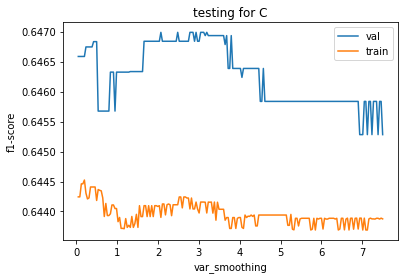

In [37]:
results_val = []
results_train = []

for C in np.linspace(1.0,7.5,200):
  clf = pipe = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=1000,C=C))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))
    


plt.title("testing for C")
plt.plot(np.linspace(0.05,7.5,200),results_val,label='val')
plt.plot(np.linspace(0.05,7.5,200),results_train,label='train')
plt.ylabel("f1-score")
plt.xlabel("var_smoothing")
plt.legend()

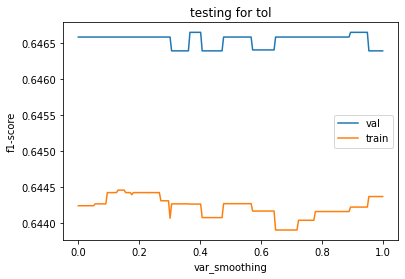

In [38]:
results_val = []
results_train = []

for tol in np.linspace(0.00001,1.0,200):
  clf = pipe = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(max_iter=1000,tol=tol))])
  clf.fit(X_train,y_train)
  pred = clf.predict(X_valid)
  results_val.append(f1_score(pred,y_valid,average="weighted"))
  pred = clf.predict(X_train)
  results_train.append(f1_score(pred,y_train,average="weighted"))
    


plt.title("testing for tol")
plt.plot(np.linspace(0.00001,1.0,200),results_val,label='val')
plt.plot(np.linspace(0.00001,1.0,200),results_train,label='train')
plt.ylabel("f1-score")
plt.xlabel("var_smoothing")
plt.legend()